In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("clinical_mastitis_cows.csv")

In [3]:
from IPython.display import display

display(data.tail(7))

,Cow_ID,Day,Breed,House Number,Address,Months after giving birth,Previous_Mastits_status,IUFL,EUFL,IUFR,EUFR,IURL,EURL,IURR,EURR,Temperature,Hardness,Pain,Milk_visibility,class1
6593,cow1099,6,Jersey,Open ground,Bantwal,5,0,235,282,235,278,310,355,244,275,43,0,0,1,1
6594,cow1100,1,Jersey,Open ground,Bantwal,5,0,237,276,306,358,236,278,238,278,43,1,0,1,1
6595,cow1100,2,Jersey,Open ground,Bantwal,5,0,243,285,310,361,241,285,246,281,43,1,0,1,1
6596,cow1100,3,Jersey,Open ground,Bantwal,5,0,240,276,315,358,242,285,247,284,43,1,0,1,1
6597,cow1100,4,Jersey,Open ground,Bantwal,5,0,242,286,315,365,237,279,248,288,43,1,0,1,1
6598,cow1100,5,Jersey,Open ground,Bantwal,5,0,245,285,314,361,239,280,241,288,43,1,0,1,1
6599,cow1100,6,Jersey,Open ground,Bantwal,5,0,247,278,316,364,242,278,238,285,43,1,0,1,1


Text(120.5815972222222, 0.5, 'predicted class')

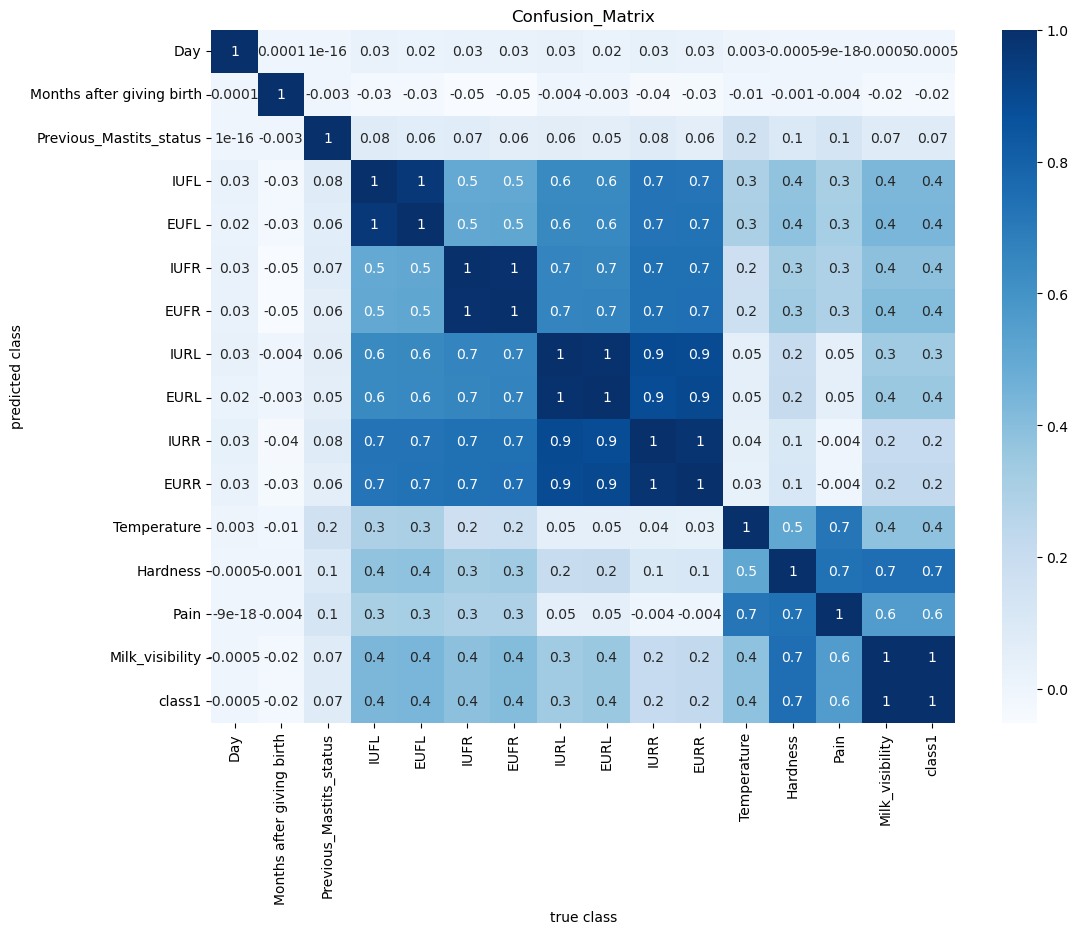

In [4]:
Z=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(Z, annot=True, cmap='Blues', fmt='.1g')
plt.title('Confusion_Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

In [5]:
data.drop(['Cow_ID','Day','House Number','Address','Milk_visibility'], axis=1, inplace=True)

In [6]:
data['Breed'].unique()

array(['Jersey', 'hostlene'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Breed']=enc.fit_transform(data['Breed'])
print(data[['Breed']].head())

   Breed
0      0
1      0
2      0
3      0
4      0


In [8]:
X = data.iloc[:, :-1]
X=X.values
Y=data.iloc[:,-1]
Y=Y.values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [10]:
df_X_test = pd.DataFrame(X_test)
print(df_X_test.index)

RangeIndex(start=0, stop=1650, step=1)


In [11]:
df_X_test = pd.DataFrame(X_test)

# Create a dataframe for Y_test
df_Y_test = pd.DataFrame(Y_test)

# Display the first 5 rows of X_test
print(df_X_test.head())

# Display the first 5 rows of Y_test
print(df_Y_test.head())

   0   1   2    3    4    5    6    7    8    9    10  11  12  13
0   0   4   0  151  181  151  181  151  181  151  182  43   0   0
1   0   2   0  313  355  155  178  156  175  159  181  47   1   1
2   0   3   0  241  276  240  276  232  276  238  280  43   0   0
3   0   4   0  237  277  232  276  302  357  237  273  43   0   0
4   0   2   0  313  361  238  284  247  287  240  280  43   0   0
   0
0  0
1  1
2  0
3  1
4  1


In [29]:
df_Y_train = pd.DataFrame(Y_train)
zz=df_Y_test.value_counts()
yy=df_Y_train.value_counts()
print(zz)


0    977
1    673
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [14]:
from IPython.display import display

display(data.head())

,Breed,Months after giving birth,Previous_Mastits_status,IUFL,EUFL,IUFR,EUFR,IURL,EURL,IURR,EURR,Temperature,Hardness,Pain,class1
0,0,1,0,150,180,150,180,150,181,150,181,43,0,0,0
1,0,1,0,152,180,152,185,151,180,152,181,42,0,0,0
2,0,1,0,152,182,153,186,151,186,153,183,41,0,0,0
3,0,1,0,155,183,155,189,155,182,155,186,40,0,0,0
4,0,1,0,150,186,150,181,150,185,150,188,41,0,0,0


Text(120.5815972222222, 0.5, 'predicted class')

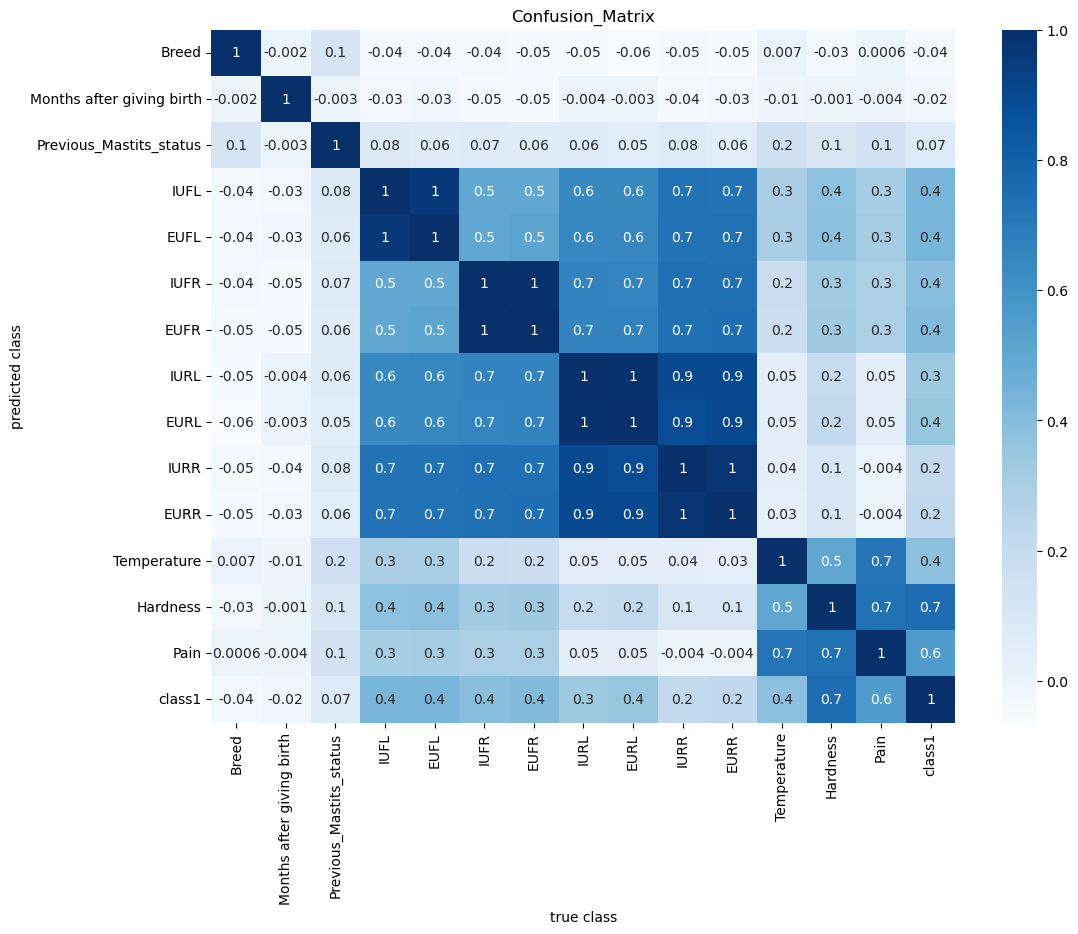

In [15]:
Z=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(Z, annot=True, cmap='Blues', fmt='.1g')
plt.title('Confusion_Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

GRID SEARCH:

In [16]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.naive_bayes import GaussianNB
#parameters = {#possible parameters}
#gnb = GaussianNB()
#clf = GridSearchCV(gnb, parameters)
#clf.fit(X_train, Y_train)

#sorted(clf.cv_results_.keys())
#best_score = clf.best_score_
#best_parameters = clf.best_params_
#print(best_score)
#print(best_parameters)

In [17]:
from sklearn import __version__

In [18]:
print(__version__)

1.0.2


Random Forest:

score on test: 0.9860606060606061
score on train: 1.0
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       977
           1       0.99      0.98      0.98       673

    accuracy                           0.99      1650
   macro avg       0.99      0.98      0.99      1650
weighted avg       0.99      0.99      0.99      1650

[[969   8]
 [ 15 658]]


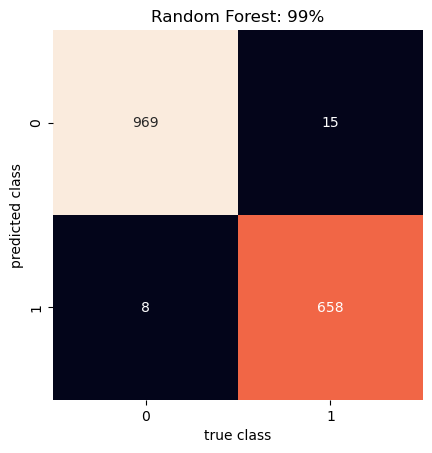

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', criterion='gini', max_features='log2',min_samples_split=3)
rf.fit(X_train, Y_train)
print("score on test: " + str(rf.score(X_test, Y_test)))
print("score on train: "+ str(rf.score(X_train, Y_train)))

y_pred = rf.predict(X_test)
rfc_model = rf.fit(X_train, Y_train)
y_rfc_proba = rfc_model.predict_proba(X_test)
y_rfc_pred = np.where(y_rfc_proba[:,1] > 0.5, 1, 0)
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False)
plt.title('Random Forest: 99%')
plt.xlabel('true class')
plt.ylabel('predicted class')
print(classification_report(Y_test.reshape(-1,1), y_pred))
print(mat)

In [20]:
from pandas import DataFrame
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
report = classification_report(Y_test, y_pred, output_dict=True)
df = DataFrame(report).transpose()
print(df)

              precision    recall  f1-score      support
0              0.985758  0.991812  0.988776   977.000000
1              0.988006  0.979198  0.983582   673.000000
accuracy       0.986667  0.986667  0.986667     0.986667
macro avg      0.986882  0.985505  0.986179  1650.000000
weighted avg   0.986675  0.986667  0.986657  1650.000000


In [21]:
#import pickle
#pickle_out = open("model_test.pkl","wb")
#pickle.dump(rf, pickle_out)
#pickle_out.close()

score on test: 0.9333333333333333
score on train: 0.941010101010101
Classification Report:               precision    recall  f1-score   support

           0       0.90      1.00      0.95       977
           1       1.00      0.84      0.91       673

    accuracy                           0.93      1650
   macro avg       0.95      0.92      0.93      1650
weighted avg       0.94      0.93      0.93      1650

[[977   0]
 [110 563]]


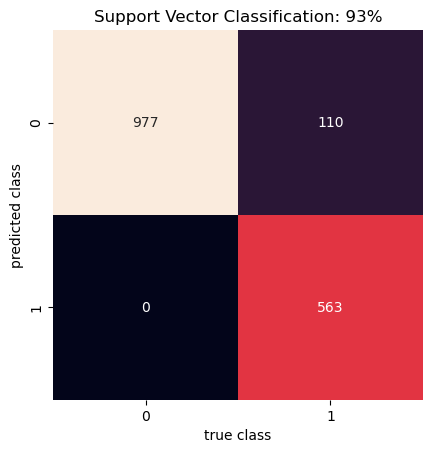

In [22]:
#from sklearn import svm
from sklearn.svm import SVC
svm=SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
svm.fit(X_train, Y_train)
print("score on test: " + str(svm.score(X_test, Y_test)))
print("score on train: "+ str(svm.score(X_train, Y_train)))

y_pred = svm.predict(X_test)
svm_model = svm.fit(X_train, Y_train)
y_svm_proba = svm_model.predict_proba(X_test)
y_svm_pred = np.where(y_svm_proba[:,1] > 0.5, 1, 0)
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False)
plt.title('Support Vector Classification: 93%')
plt.xlabel('true class')
plt.ylabel('predicted class')
print('Classification Report:',classification_report(Y_test.reshape(-1,1), y_pred))
print(mat)

score on test: 0.9296969696969697
score on train: 0.9385858585858586
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.99      0.94       977
           1       0.99      0.84      0.91       673

    accuracy                           0.93      1650
   macro avg       0.94      0.91      0.93      1650
weighted avg       0.94      0.93      0.93      1650



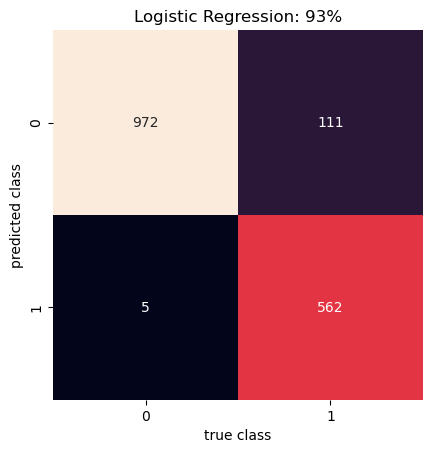

In [23]:
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
print("score on test: " + str(lr.score(X_test, Y_test)))
print("score on train: "+ str(lr.score(X_train, Y_train)))

y_pred = lr.predict(X_test)
lr_model = lr.fit(X_train, Y_train)
y_lr_proba = lr_model.predict_proba(X_test)
y_lr_pred = np.where(y_lr_proba[:,1] > 0.5, 1, 0)
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False)
plt.title('Logistic Regression: 93%')
plt.xlabel('true class')
plt.ylabel('predicted class')
print('Classification Report:',classification_report(Y_test.reshape(-1,1), y_pred))

score on test: 0.9703030303030303
score on train: 1.0
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97       977
           1       0.95      0.98      0.96       673

    accuracy                           0.97      1650
   macro avg       0.97      0.97      0.97      1650
weighted avg       0.97      0.97      0.97      1650



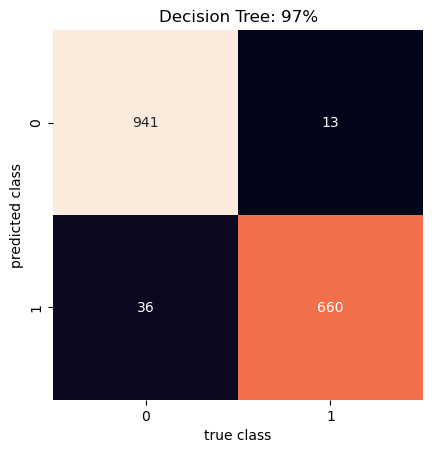

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
print("score on test: "  + str(clf.score(X_test, Y_test)))
print("score on train: " + str(clf.score(X_train, Y_train)))
y_pred = clf.predict(X_test)

clf_model = clf.fit(X_train, Y_train)
y_clf_proba = clf_model.predict_proba(X_test)
y_clf_pred = np.where(y_clf_proba[:,1] > 0.5, 1, 0)

mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False)
plt.title('Decision Tree: 97%')
plt.xlabel('true class')
plt.ylabel('predicted class')
print('Classification Report:',classification_report(Y_test.reshape(-1,1), y_pred))

score on test: 0.9193939393939394
score on train: 0.925050505050505
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       977
           1       0.98      0.82      0.89       673

    accuracy                           0.92      1650
   macro avg       0.93      0.90      0.91      1650
weighted avg       0.92      0.92      0.92      1650



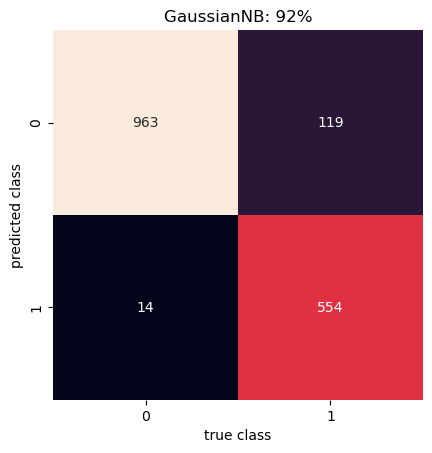

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=[0.1, 0.9], var_smoothing= 0.1)
gnb.fit(X_train, Y_train)
print("score on test: " + str(gnb.score(X_test, Y_test)))
print("score on train: "+ str(gnb.score(X_train, Y_train)))

y_pred = gnb.predict(X_test)

gnb_model = gnb.fit(X_train, Y_train)
y_gnb_proba = gnb_model.predict_proba(X_test)
y_gnb_pred = np.where(y_gnb_proba[:,1] > 0.5, 1, 0)

mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False)
plt.title('GaussianNB: 92%')
plt.xlabel('true class')
plt.ylabel('predicted class')
print('Classification Report:',classification_report(Y_test.reshape(-1,1), y_pred))

score on test: 0.9563636363636364
score on train: 1.0
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.98      0.96       977
           1       0.97      0.92      0.95       673

    accuracy                           0.96      1650
   macro avg       0.96      0.95      0.95      1650
weighted avg       0.96      0.96      0.96      1650



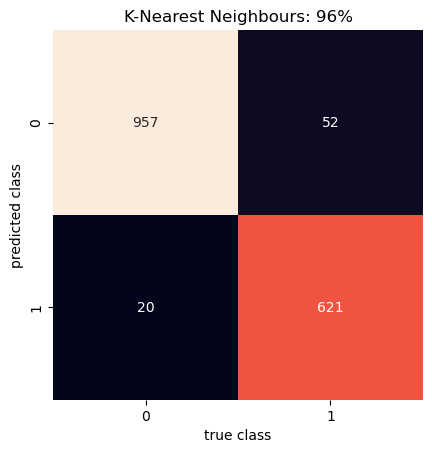

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
KNN = KNeighborsClassifier(n_neighbors=5,
                           weights='distance',
                           algorithm='auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski',
                           n_jobs=1)
KNN.fit(X_train, Y_train)
print("score on test: " + str(KNN.score(X_test, Y_test)))
print("score on train: "+ str(KNN.score(X_train, Y_train)))
Y_pred=KNN.predict(X_test)

knn_model = KNN.fit(X_train, Y_train)
y_knn_proba =knn_model.predict_proba(X_test)
y_knn_pred = np.where(y_knn_proba[:,1] > 0.5, 1, 0)

mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False)
plt.title('K-Nearest Neighbours: 96%')
plt.xlabel('true class')
plt.ylabel('predicted class')
print('Classification Report:',classification_report(Y_test.reshape(-1,1), Y_pred))

In [27]:
print('Cross_val',cross_val_score(KNN,Y_test.reshape(-1,1),Y_pred, cv=10))
knn_acc = np.mean(cross_val_score(KNN,Y_test.reshape(-1,1),Y_pred))
print('Mean_Accuracy',knn_acc)

Cross_val [0.95757576 0.96363636 0.95757576 0.95151515 0.97575758 0.96363636
 0.95757576 0.93939394 0.93939394 0.95757576]
Mean_Accuracy 0.9563636363636363


In [28]:
import scikitplot as skplt

In [29]:
#skplt.metrics.plot_roc(Y_test, y_rfc_proba, title = 'ROC Plot for Random Forest')

In [30]:
#skplt.metrics.plot_precision_recall(Y_test, y_rfc_proba, title = 'PR Curve for Random Forest')

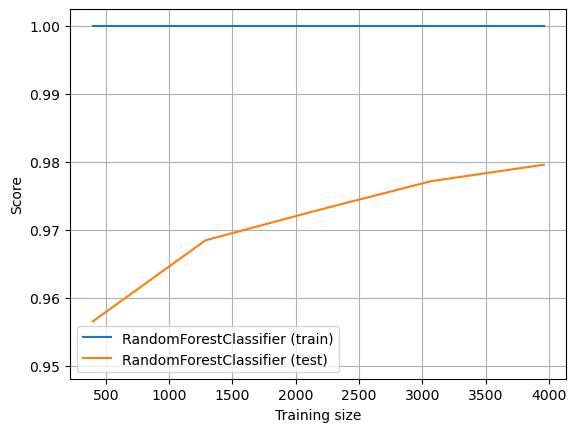

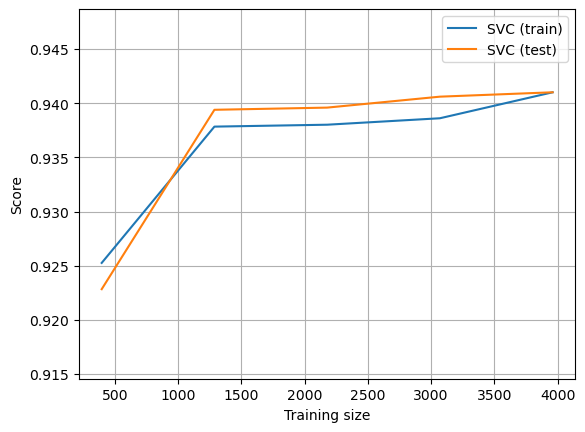

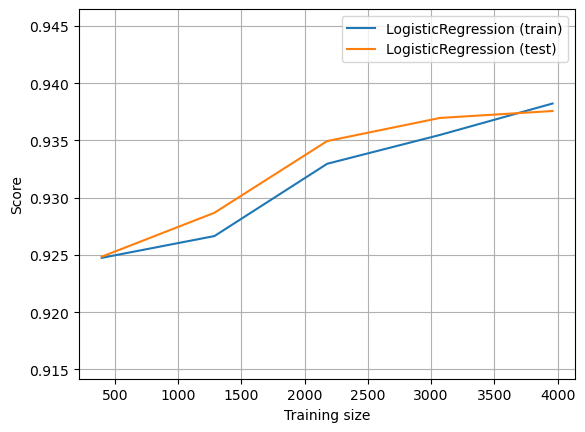

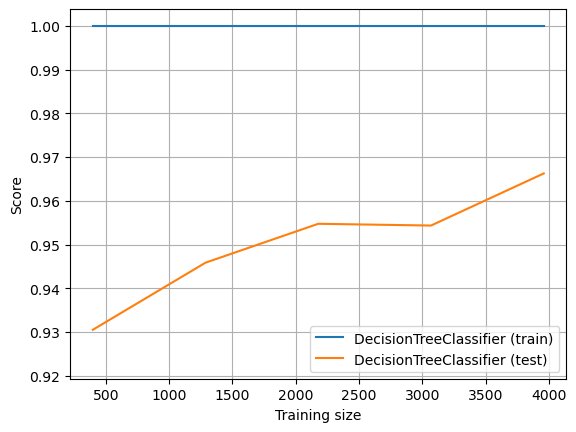

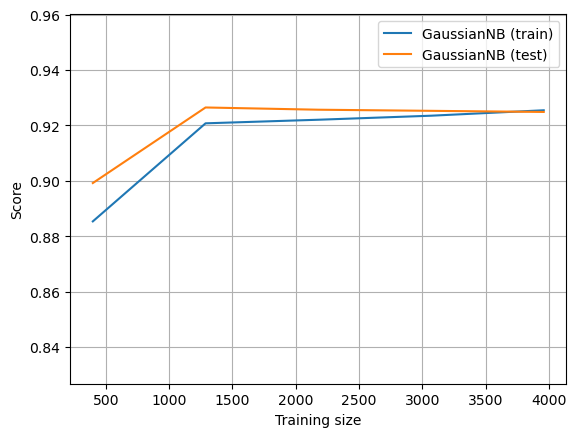

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(models, X, y):
    for model in models:
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)


        plt.plot(train_sizes, train_scores_mean, label=f"{model.__class__.__name__} (train)")
        plt.plot(train_sizes, test_scores_mean, label=f"{model.__class__.__name__} (test)")
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0)
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0)
        plt.xlabel("Training size")
        plt.ylabel("Score")
        plt.legend(loc="best")
        plt.grid()
        plt.show()


X, y = X_train, Y_train

models = [RandomForestClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier(),GaussianNB(priors=[0.1, 0.9], var_smoothing= 0.1)]
plot_learning_curves(models, X, y)


C:\Users\kawsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kawsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kawsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kawsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kawsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kawsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kawsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


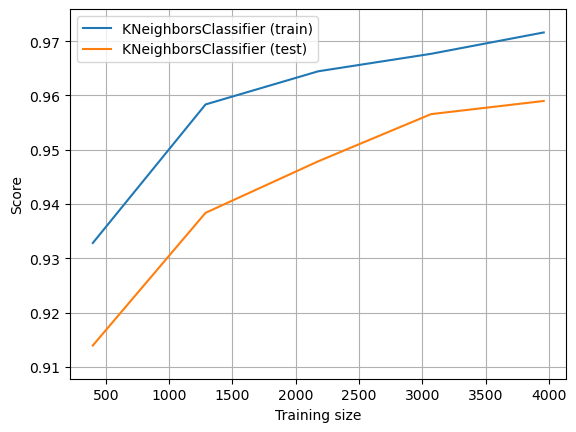

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(models, X, y):
    for model in models:
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)


        plt.plot(train_sizes, train_scores_mean, label=f"{model.__class__.__name__} (train)")
        plt.plot(train_sizes, test_scores_mean, label=f"{model.__class__.__name__} (test)")
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0)
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0)
        plt.xlabel("Training size")
        plt.ylabel("Score")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

# Example usage:
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB


X, y = X_train, Y_train

models = [KNeighborsClassifier()]
plot_learning_curves(models, X, y)

In [33]:
from sklearn.tree import export_text

print(export_text(rf.estimators_[0], 
                  spacing=3, decimals=3,
                  feature_names=('Breed','Months','History','IUFL','EUFL','IUFR','EUFR','IURL','EURL','IURR','EURR','Temperature','Hardness','Pain')))

|--- IURL <= 1.491
|   |--- IUFL <= 0.528
|   |   |--- Hardness <= 0.502
|   |   |   |--- EURL <= 0.598
|   |   |   |   |--- Months <= -0.493
|   |   |   |   |   |--- IUFR <= 1.192
|   |   |   |   |   |   |--- EUFL <= -1.232
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- EUFL >  -1.232
|   |   |   |   |   |   |   |--- EURL <= 0.410
|   |   |   |   |   |   |   |   |--- EUFR <= -1.031
|   |   |   |   |   |   |   |   |   |--- EURR <= -1.073
|   |   |   |   |   |   |   |   |   |   |--- IURL <= -1.057
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- IURL >  -1.057
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- EURR >  -1.073
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- EUFR >  -1.031
|   |   |   |   |   |   |   |   |   |--- IURR <= -0.933
|   |   |   |   |   |   |   |   |   | 

NEURAL NETWORKS:

In [34]:
import os
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow Version:{tf.version.VERSION}")

Tensorflow Version:2.11.0


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [36]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

In [37]:
print(data.shape)

(6600, 15)


In [38]:
temp_data = data.sample(frac=1)
train_dataset, temp_test_dataset = train_test_split(temp_data, test_size=0.4)
print( train_dataset.shape)
print( temp_test_dataset.shape)

(3960, 15)
(2640, 15)


In [39]:
test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print( valid_dataset.shape)

(1320, 15)
(1320, 15)


In [40]:
train_stats = train_dataset.describe()
train_stats.pop("class1")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Breed,3960.0,0.015404,0.123169,0.0,0.0,0.0,0.0,1.0
Months after giving birth,3960.0,3.351768,1.685637,1.0,2.0,3.0,5.0,6.0
Previous_Mastits_status,3960.0,0.003030,0.054972,0.0,0.0,0.0,0.0,1.0
IUFL,3960.0,217.619192,50.085645,130.0,159.0,233.0,240.0,322.0
EUFL,3960.0,252.511364,57.888225,152.0,187.0,273.0,280.0,372.0
IUFR,3960.0,215.124242,47.578066,130.0,159.0,233.0,240.0,343.0
EUFR,3960.0,250.847222,55.446546,151.0,187.0,273.0,280.0,393.0
IURL,3960.0,213.332828,49.893018,130.0,158.0,233.0,239.0,321.0
EURL,3960.0,248.930303,58.336363,152.0,185.0,273.0,280.0,372.0
IURR,3960.0,206.474495,40.619058,121.0,158.0,233.0,238.0,315.0


In [41]:
train_labels = train_dataset.pop('class1')
test_labels = test_dataset.pop('class1')
valid_labels = valid_dataset.pop('class1')

In [42]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [43]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')

Train/Test/Validate splits: 
Train    : (3960, 14) 
Test     : (1320, 14) 
Validate : (1320, 14) 
Train/Test/Validate labels: 
Train Labels : (3960,) 
Test Labels  : (1320,) 
Test Labels  : (1320,) 


In [44]:
normed_train_data.head(10)

,Breed,Months after giving birth,Previous_Mastits_status,IUFL,EUFL,IUFR,EUFR,IURL,EURL,IURR,EURR,Temperature,Hardness,Pain
6563,-0.125064,-0.801933,-0.055125,0.686440,0.716703,0.880148,0.760242,0.855173,0.858293,1.243887,1.336567,2.609199,-0.619315,-0.469344
5628,-0.125064,-0.208685,-0.055125,0.287124,0.336660,0.396732,0.417569,1.757103,1.783959,0.653031,0.697077,1.314125,1.614280,2.130098
2223,-0.125064,-0.208685,-0.055125,-1.190345,-1.321709,-1.284715,-1.259722,-1.109029,-1.130175,-1.316488,-1.242711,-0.304719,-0.619315,-0.469344
3711,-0.125064,0.977810,-0.055125,0.506748,0.440308,0.459787,0.453640,0.394187,0.464028,0.874602,0.867608,-0.304719,-0.619315,-0.469344
2973,-0.125064,0.384562,-0.055125,0.287124,0.405758,1.889017,1.878436,0.273930,0.344034,0.776126,0.803659,-0.304719,-0.619315,-0.469344
5289,-0.125064,1.571058,-0.055125,-1.150413,-1.235335,2.687704,2.419497,-1.249330,-0.993039,-1.218012,-1.114813,0.342819,-0.619315,2.130098
5540,-0.125064,0.384562,-0.055125,-1.230277,-1.390807,-1.284715,-1.295793,-1.149115,-1.130175,-1.341107,-1.285343,-0.304719,-0.619315,-0.469344
4224,-0.125064,0.384562,-0.055125,-1.310140,-1.390807,-1.305733,-1.404005,-1.229287,-1.301595,-1.341107,-1.455874,-0.304719,-0.619315,-0.469344
6405,-0.125064,-0.208685,-0.055125,1.684730,1.856831,0.943203,0.525782,0.895259,0.549738,1.219268,0.910240,3.904274,1.614280,2.130098
3458,-0.125064,-1.395181,-0.055125,0.466817,0.440308,1.952071,1.914507,0.574573,0.446886,0.825364,0.846291,1.314125,1.614280,2.130098


In [45]:
#def build_model2_three_hidden_layers():
    
#    model = Sequential()
#    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))   
#    model.add(Dense(32,Activation('relu')))       
#    model.add(Dense(64, Activation('relu')))  
#    model.add(Dense(128, Activation('relu')))   
#    model.add(Dense(1))
    #model.add(Dense(1, activation='sigmoid'))
 
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
 #   learning_rate = 0.001
 #   optimizer = optimizers.Adam(learning_rate)
 #   model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  #              optimizer=optimizer,
  #              metrics=['accuracy']) 
  #  return model

#EPOCHS = 100
#batch_size = 16 # 6 iteration

#model = build_model2_three_hidden_layers()
#print('Here is a summary of this model: ')
#model.summary()

#with tf.device('/CPU:0'): # it can be with '/CPU:0'
#with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
#    history = model.fit(
#        normed_train_data, 
#        train_labels,
#        batch_size = batch_size,
#        epochs=EPOCHS, 
#        verbose=1,
#        shuffle=True,
#        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
#        validation_data = (normed_valid_dataset, valid_labels),   
#    )

In [46]:
#print('Summary of the results after each epoch: ')
#hist = pd.DataFrame(history.history)
#hist['epoch'] = history.epoch
#hist.tail()

In [47]:
#from matplotlib import pyplot as plt
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['Train', 'Cross-Validation'], loc='upper left')
#plt.show()

In [48]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model Loss')
#plt.ylabel('Loss')
#plt.xlabel('epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

In [49]:
#print('Train Split: ')
#loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

#print("Accuracy   : {:5.2f} ".format(accuracy))

#print('Evaluation Split: ')
#loss, nn_accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

#print("Accuracy   : {:5.2f} ".format(accuracy))

#print('Test Split: ')
#loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

#print("Accuracy   : {:5.2f} ".format(accuracy))

In [50]:
#ax= plt.subplot()
#predict_results = model.predict(normed_test_data)

#predict_results = (predict_results > 0.5)

#cm = confusion_matrix(test_labels, predict_results)
#cm = cm.astype(np.int32)

#sns.heatmap(cm, annot=True, ax = ax,square=True,fmt='d',cbar=False); #annot=True to annotate cells

# labels, title and ticks
#ax.set_xlabel('true class');ax.set_ylabel('predicted class'); 
#ax.set_title('Neural Network: 98%'); 

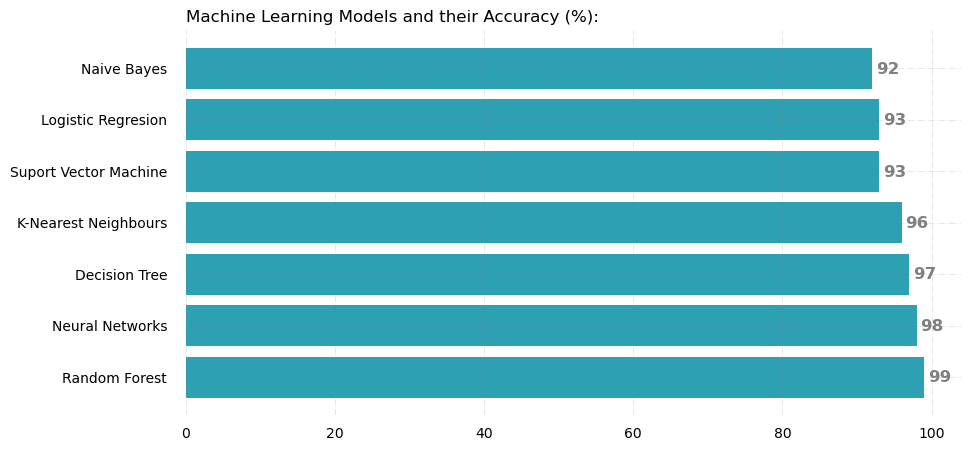

In [51]:
name = ['Naive Bayes','Logistic Regresion', 'Suport Vector Machine','K-Nearest Neighbours','Decision Tree','Neural Networks','Random Forest']
price = [92,93,93,96,97,98,99]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 5))
 
# Horizontal Bar Plot
ax.barh(name, price, color ='#2DA0B4',)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.7,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
plt.title('Machine Learning Models and their Accuracy (%):',
             loc ='left', )
 
 
# Show Plot
#plt.xlabel("Accuracy:")
#plt.ylabel("Model Comparision:")
plt.show()

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

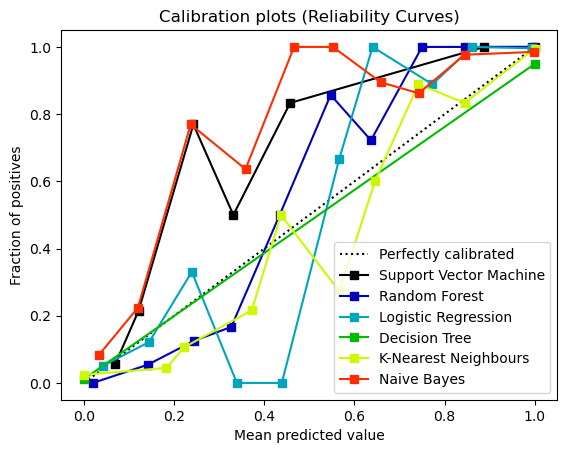

In [52]:
probas_list = [y_svm_proba, y_rfc_proba, y_lr_proba,y_clf_proba,y_knn_proba,y_gnb_proba]
clf_names = ['Support Vector Machine', 'Random Forest', 'Logistic Regression','Decision Tree','K-Nearest Neighbours','Naive Bayes']
skplt.metrics.plot_calibration_curve(Y_test, probas_list = probas_list, clf_names = clf_names)

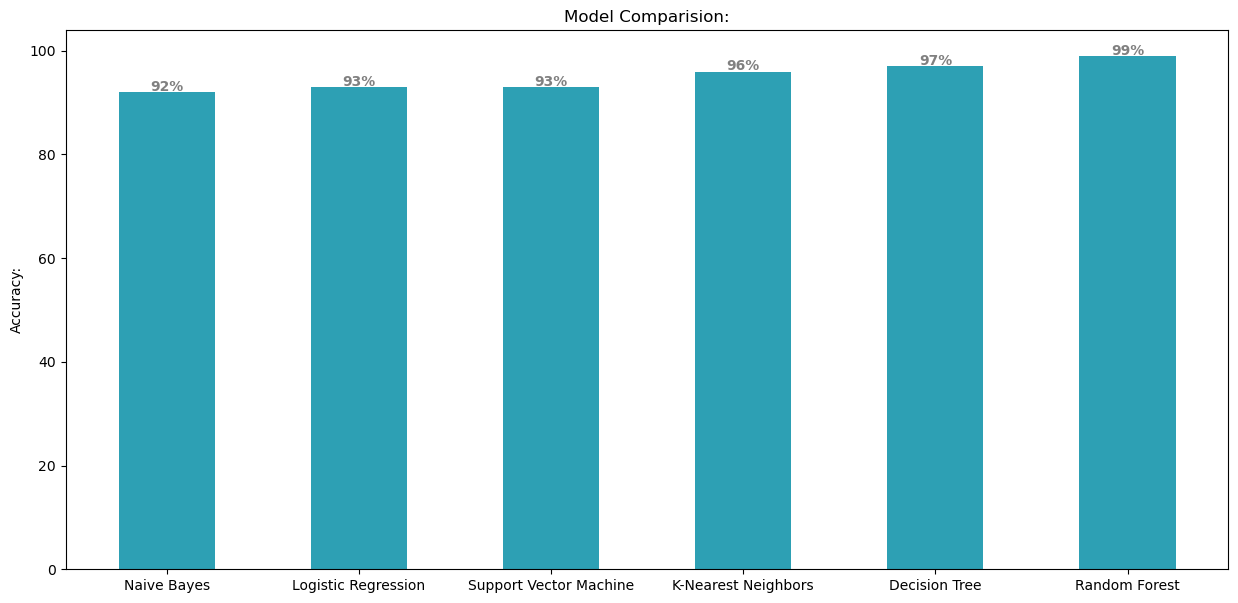

In [53]:
plotter = {'Naive Bayes':92,'Logistic Regression':93, 'Support Vector Machine':93,'K-Nearest Neighbors':96,'Decision Tree':97,'Random Forest':99}
courses = list(plotter.keys())
values = list(plotter.values())

fig = plt.figure(figsize = (15, 7))

# creating the bar plot
plt.bar(courses, values, color ='#2DA0B4', width = 0.5)

# adding values on top of bars
for i, v in enumerate(values):
    plt.text(i, v+1, str(v)+ '%', color='grey',fontsize = 10, fontweight='bold', ha='center', va='center')

#plt.xlabel()
plt.ylabel("Accuracy:")
plt.title("Model Comparision:")
plt.show()